In [37]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import coremltools


In [38]:
json_data_frame = pd.read_json('final_artist.json')

In [39]:
json_data_frame.head(10)

,Artist,City,Genre1,Genre2,Genre3,Genre4,Latitude,Longitude
0,0,0,0,1.0,2.0,3.0,0,0
1,1,1,6,7.0,8.0,9.0,1,1
2,2,2,12,13.0,14.0,15.0,2,2
3,3,3,18,19.0,20.0,21.0,3,3
4,4,4,24,16.0,25.0,26.0,4,4
5,5,5,29,10.0,30.0,31.0,5,5
6,6,6,31,34.0,35.0,36.0,6,6
7,7,7,37,38.0,39.0,40.0,7,7
8,8,8,25,43.0,44.0,45.0,8,8
9,9,9,34,48.0,49.0,50.0,9,9


In [56]:
# Load the model
model =  coremltools.models.MLModel('Artist.mlmodel')

# Make the first recommendation
recommendation_one = model.predict({'City': 160, 'Genre1': 78, 'Latitude': 141, 'Longitude': 141})
recommendation_one

{u'Artist': 334.1846974375724}

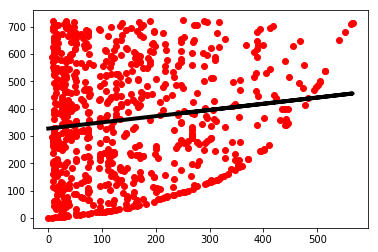

In [54]:
# Create a sample regression for Genre1 and Artists to illustrate our data plotted on the coordinate system
X = json_data_frame['Genre1'].values[:,np.newaxis] 
y = json_data_frame['Artist'].values

lr_model = LinearRegression()
lr_model.fit(X, y)

plt.scatter(X, y,color='r')
plt.plot(X, lr_model.predict(X),color='k', linewidth=4)
plt.show()